In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine

# 2.4

In [2]:
# load data from the text file
data = np.loadtxt('data_HL_simple.txt', usecols=range(5))
print(data[1:5,:])

# we need a vector of 5 parameters
w = np.random.normal(0, 0.5, 5)

print("initial weights")
print(w)

# learning rate; don't change the learning rate epsilon when you are working on questions 2 and 3, unless you really know what you are doing. You may want to make the learning rate dependent on the epoch number to converge to a stable solution.
epsilon = 0.01

num_iterations = 6

update = 0
# we can do a fixed number of iterations because the simple Hebb rule won't converge
for i in range(num_iterations):
    for x in data:
        #linear activation(yj)
        yj=np.dot(x,w)
        
        #hebb rule
        change=epsilon*(x*yj)
        
        #new weights
        w=w+change
        

    
        
        update = update + 1
        if update % 10 == 0:
            # print every 10th update
            print("\tCurrent input: " + str(x))
            # print the weights for every x to see how they are evolving
            print("New Weights:\n" + str(w))

# the final weights
print(f"Final weights ")
print(w)


[[-1.  0. -1. -1.  1.]
 [-1. -1. -1. -1.  1.]
 [ 1.  0.  1.  1. -1.]
 [ 0. -1.  0.  0.  0.]]
initial weights
[-0.16272571  0.61211966  0.20849063  0.30014054 -0.47679795]
	Current input: [0. 0. 0. 0. 0.]
New Weights:
[-0.11991384  0.65148653  0.29070212  0.38235203 -0.55900944]
	Current input: [-1.  0. -1. -1.  1.]
New Weights:
[-0.08519708  0.68964536  0.36020145  0.45185137 -0.62850878]
	Current input: [0. 1. 0. 0. 0.]
New Weights:
[-0.07378667  0.71595443  0.42046918  0.5121191  -0.6887765 ]
	Current input: [ 0.  0.  1.  1. -1.]
New Weights:
[-0.10482019  0.75524482  0.55372459  0.64537451 -0.82203191]
	Current input: [ 1.  1.  1.  1. -1.]
New Weights:
[-0.05234689  0.77928273  0.69721305  0.78886296 -0.96552037]
	Current input: [0. 0. 0. 0. 0.]
New Weights:
[ 0.06108828  0.85864392  0.90154202  0.99319194 -1.16984934]
	Current input: [-1.  0. -1. -1.  1.]
New Weights:
[ 0.15009205  0.93031642  1.07429416  1.16594407 -1.34260148]
	Current input: [0. 1. 0. 0. 0.]
New Weights:
[ 0.173

w[3] and w[4]are negatively correlated
w[2] and w[4]are also negatively correlated
w[2] and w[3] have strong positive correlation



# 3.4

In [3]:
# load data from the text file
data = np.loadtxt('data_two_groups.txt', usecols=range(5))
print(data[1:5,:])

# we need a vector of 5 parameters
w = np.random.normal(0, 0.5, 5)

print("initial weights")
print(w)

# learning rate; don't change the learning rate epsilon when you are working on questions 2 and 3, unless you really know what you are doing. You may want to make the learning rate dependent on the epoch number to converge to a stable solution.
epsilon = 0.01

num_iterations = 6

update = 0
# we can do a fixed number of iterations because the simple Hebb rule won't converge
for i in range(num_iterations):
    for x in data:
        #linear activation(yj)
        yj=np.dot(x,w)
        
        #hebb rule
        change=epsilon*yj*(x-(yj*w))
        
        #new weights
        w=w+change
        

    
        
        update = update + 1
        #if update % 10 == 0:
            # print every 10th update
            #print("\tCurrent input: " + str(x))
            # print the weights for every x to see how they are evolving
            #print("New Weights:\n" + str(w))



PC=w/np.linalg.norm(w)
print(f"Final weights are ")
print(w)
print(f"The principal component is ")
print(PC)

[[-0.20752314 -0.36773773  1.22059844  0.55048877  1.88427215]
 [-1.57125555  1.32390861 -1.47812951 -1.43172722 -3.19127369]
 [-0.82290562  2.27103446 -2.12484964 -2.12484964 -4.13049738]
 [ 0.97027764  0.91336865 -3.52387133 -3.22573866 -6.63143683]]
initial weights
[-0.09070084  0.29910776  0.3822239   0.7590566  -0.19410138]
Final weights are 
[0.01013898 0.06948741 0.40159127 0.41706502 0.82141671]
The principal component is 
[0.0100644  0.06897627 0.39863725 0.41399718 0.81537455]


# 3.5

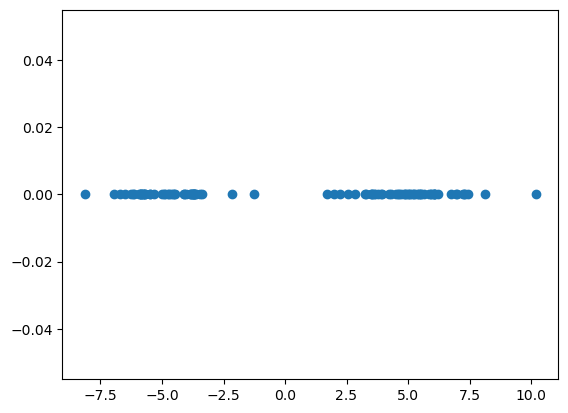

In [4]:
x=np.dot(data,w)
y=np.zeros(len(x))
plt.scatter(x,y) #scatter plot with the x and y variables
plt.show()

# 1.2 (Part 2)

The variable X_pca corresponds to yj in our lecture notes. It has a range of the number of data items, which are setosa,versicolor and virginica

[[1.03073034 0.50488764]
 [0.73073034 0.35488764]
 [1.21073034 0.50488764]
 [1.46073034 1.55488764]
 [0.66073034 0.50488764]]
the parameters/axis
[[0.86285419 0.50545291]]
data_pca is the 1D representation of our data:
[[0.80989272]
 [1.29988067]
 [2.04631978]
 [0.82531087]]


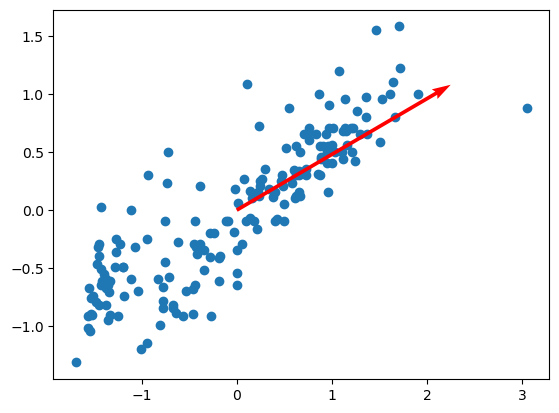

In [5]:
wine = load_wine()
#dfwine = pd.DataFrame(wine.data, columns=wine.feature_names)
#print(dfwine.corr())

# we select 2 features that are correlated in this dataset
ind = [wine['feature_names'].index('flavanoids'), wine['feature_names'].index('total_phenols')]
data = wine.data[:,ind]
# we centre the data to make the code below simpler
data = data - np.mean(data, axis=0)
print(data[0:5,:])

# we will extract 1 component; note that our data is 2D
n_components = 1

pca = PCA(n_components=n_components)

# We fit the model and transform the data in one line.
data_pca = pca.fit_transform(data)
print("the parameters/axis")
print(pca.components_)
print("data_pca is the 1D representation of our data:")
print(data_pca[1:5])

# plot the data with the first PC
plt.scatter(data[:,0], data[:,1])
plt.quiver(pca.components_[0][0], pca.components_[0][1], color=['red'], scale=2)
plt.show()

# data is the original data, and data_pca is the low dimensional representation of the data
# your next step is to compute data_rec, which will be the reconstruction of the original data using data_pca
# we are interested in the errors between data and data_rec

# 3.1(Part 2)

In [6]:
data_rec=pca.inverse_transform(data_pca)
print(data_rec)

[[ 0.98759436  0.57852468]
 [ 0.69881933  0.40936263]
 [ 1.12160749  0.65702847]
 [ 1.7656756   1.03431828]
 [ 0.71212294  0.41715578]
 [ 1.43826721  0.84252513]
 [ 0.45471534  0.26636852]
 [ 0.49088339  0.28755546]
 [ 0.92803298  0.54363411]
 [ 1.13310472  0.66376345]
 [ 1.2465887   0.73024144]
 [ 0.25686913  0.15047183]
 [ 0.67701272  0.3965885 ]
 [ 1.58747995  0.92993273]
 [ 1.63748051  0.95922265]
 [ 0.89772337  0.52587899]
 [ 1.04715575  0.61341525]
 [ 1.30615009  0.76513201]
 [ 1.85339054  1.08570098]
 [ 0.92164563  0.53989245]
 [ 1.15671771  0.67759575]
 [ 0.33356654  0.19540054]
 [ 0.77071613  0.45147919]
 [ 0.3343151   0.19583904]
 [ 0.53480587  0.31328489]
 [ 0.6305353   0.36936241]
 [ 0.92005889  0.53896295]
 [ 0.1654114   0.09689664]
 [ 0.98600763  0.57759518]
 [ 0.37867687  0.2218258 ]
 [ 1.21627909  0.71248632]
 [ 1.11054955  0.65055082]
 [ 0.54639272  0.32007237]
 [ 0.81476863  0.47728478]
 [ 0.39674069  0.23240744]
 [ 0.88441976  0.51808584]
 [ 0.61745134  0.36169793]
 

# Delta Rule vs Perceptron learning algorithm

Both of these are supervised learning algorithms used to train ANNs. However,
1. The perceptron learning algorithm is linear. This means it is only capable of learning linear decision boundaries. It is severely limited in its applicaton because it cannot learn non-linear functions. Therefore it cannot be used to train stuff like multi-layer perceptrons, only single layer ones. The delta rule however has no such limitations. It is also supervised, like the former, and can learn multiple functions, including non-linear ones. This makes it a great alternative, especially for training networks like multi-layer perceptrons and modular neural networks.
2.Since the perceptron learning algorithm only computes linear functions, it is quicker to run than the delta rule. It also takes up less Processing power and RAM space, which makes it a good choice for training neural networks on a budget. By comparsion, the delta rule, having a larger range of abilities, is significantly more taxing on the computer.

references
"Neural Network and Learning Machines" by Simon Haykin